In [1]:
from IPython.display import display, Math, Latex
import math
from math import sqrt, cos, sin, pi
import numpy as np
from numpy import linspace
import statsmodels.api as sm
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.stats import norm
from scipy.stats.kde import gaussian_kde
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.mlab as ml
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import seaborn as sb
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# physical constants for natural units c = G = 1
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [3]:
'''Data for McConnell and Ma 2013 Mass BH - M Bulge'''

def MM13MassBulgeScatter(bulge):
    """
    M_BH-M_bulge. Bulge mass to black hole mass (note that M_bulge = Mstar; assume these are the same)
    McConnell and Ma (2013) relation below Figure 3
    Includes scatter in the relation, \epsilon = 0.34
    Answer in solar masses.
    """
    exponent = 8.46+1.05*log10(bulge / 1e11)
    ans_w_scatter = np.random.normal(exponent, 0.34)
    return 10**ans_w_scatter


def MM13MassBulgeNoScatter(bulge):
    """
    M_BH-M_bulge. Bulge mass to black hole mass (note that M_bulge = Mstar; assume these are the same)
    McConnell and Ma (2013) relation below Figure 3
    Includes scatter in the relation, \epsilon = 0.34
    Answer in solar masses.
    """
    exponent = 8.46+1.05*log10(bulge / 1e11)
    return 10**(exponent)

'creates data of predicted black hole masses given the mass of the bulge'
numsScatterMM13 = []
numsLoggedMM13 = []

for x in range(10000):
    numsScatterMM13.append(MM13MassBulgeScatter(3e11))
    numsLoggedMM13.append(log10(MM13MassBulgeScatter(3e11)))

In [4]:
'''Data for Kormendy and Ho 2013 Mass BH - M Bulge'''

#Only error in 0.49
def KH13MassBulgeScatterA(bulge):
    first_scatter = (np.random.normal(0.49, 0.06))
    ans = first_scatter * pow((bulge / 1e11), 1.16)
    return ans * 1e9

#only Error in exponent
def KH13MassBulgeScatterB(bulge):
    second_scatter = (np.random.normal(1.16, 0.08))
    ans = 0.49 * pow((bulge / 1e11), second_scatter)
    return ans * 1e9

#complete error
def KH13MassBulgeScatter(bulge):
    first_scatter = np.random.normal(0.49, 0.06)
    second_scatter = np.random.normal(1.16, 0.08)
    ans = (first_scatter * pow((bulge / 1e11), second_scatter))
    logM = log10(ans) 
    scatterM = np.random.normal(logM, 0.29) + 9
    return 10**scatterM

def KH13MassBulgeNoScatter(bulge):
    ans = 0.49 * pow((bulge / 1e11), 1.16) * 1e9
    return ans
    

'creates data of predicted black hole masses given the mass of the bulge'
numsScatterKH13 = []
numsScatterLogAKH13 = []
numsScatterLogBKH13 = []
numsLoggedKH13 = []

for x in range(10000):
    numsScatterKH13.append(KH13MassBulgeScatter(3e11))
    numsScatterLogAKH13.append(log10(KH13MassBulgeScatterA(3e11)))
    numsScatterLogBKH13.append(log10(KH13MassBulgeScatterB(3e11)))
    numsLoggedKH13.append(log10(KH13MassBulgeScatter(3e11)))

In [5]:
'''Data for Haring and Rix 2004 Mass BH - M Bulge'''
def HR04MassBulgeNoScatter(bulge):
    ans = 8.20+(1.12*log10(bulge/1e11))
    return 10**(ans)

#Error in 8.2
def HR04MassBulgeScatterA(bulge):
    first_scatter = (np.random.normal(8.20, 0.1))
    ans = first_scatter+(1.12*log10(bulge/1e11))
    return 10**(ans)

#Error 1.12
def HR04MassBulgeScatterB(bulge):
    second_scatter = (np.random.normal(1.12, 0.06))
    ans = 8.20+(second_scatter*log10(bulge/1e11))
    return 10**(ans)

#All Error
def HR04MassBulgeScatter(bulge):
    first_scatter = (np.random.normal(8.20, 0.1))
    second_scatter = (np.random.normal(1.12, 0.06))
    ans = np.random.normal((first_scatter+(second_scatter*log10(bulge/1e11))), 0.3)
    return 10**(ans)

'creates data of predicted black hole masses given the mass of the bulge'

numsScatterHR04 = []
numsScatterLogAHR04 = []
numsScatterLogBHR04 = []
numsLoggedHR04 = []

for x in range(10000):
    numsScatterHR04.append(HR04MassBulgeScatter(3e11))
    numsScatterLogAHR04.append(log10(HR04MassBulgeScatterA(3e11)))
    numsScatterLogBHR04.append(log10(HR04MassBulgeScatterB(3e11)))
    numsLoggedHR04.append(log10(HR04MassBulgeScatter(3e11)))

In [6]:
'''Data for McConnell and Ma 2013 Mass BH - Sigma'''

def MM13SigmaScatter(sigma):
    """
    M_BH-M_bulge. Bulge mass to black hole mass (note that M_bulge = Mstar; assume these are the same)
    McConnell and Ma (2013) relation below Figure 3
    Includes scatter in the relation, \epsilon = 0.34
    Answer in solar masses.
    """
    exponent = 8.32+5.64*log10(sigma/200)
    ans_w_scatter = np.random.normal(exponent,0.38)
    return 10**ans_w_scatter

def MM13SigmaNoScatter(sigma):
    """
    M_BH-M_bulge. Bulge mass to black hole mass (note that M_bulge = Mstar; assume these are the same)
    McConnell and Ma (2013) relation below Figure 3
    Includes scatter in the relation, \epsilon = 0.34
    Answer in solar masses.
    """
    ans = 8.32+5.64*log10(sigma/200)
    return 10**ans


#arrays for data
numsSigScatterMM13 = []
numsSigLoggedMM13 = []

for x in range(10000):
    numsSigScatterMM13.append(MM13SigmaScatter(300))
    numsSigLoggedMM13.append(log10(MM13SigmaScatter(300)))



In [7]:
'''Data for Kormendy and Ho 2013 Mass BH - Sigma'''

#Only error in 0.49
def KH13SigmaScatterA(sigma):
    first_scatter = (np.random.normal(0.309, 0.037)) #non symmetric
    ans = first_scatter * pow((sigma / 200), 4.38)
    return ans * 1e9

#only Error in exponent
def KH13SigmaScatterB(sigma):
    second_scatter = (np.random.normal(4.38, 0.29))
    ans = 0.542 * pow((sigma / 200), second_scatter)
    return ans * 1e9

#complete error
def KH13SigmaScatter(sigma):
    first_scatter = (np.random.normal(0.309, 0.037))
    second_scatter = (np.random.normal(4.38, 0.29))
    
    ans = (first_scatter * pow((sigma / 200), second_scatter))
    logM = log10(ans)
    scatterM = np.random.normal(logM, 0.29) + 9
    return 10**scatterM
           

def KH13SigmaNoScatter(sigma):
    ans = 0.309 * pow((sigma / 200), 4.38) * 1e9
    return ans


numsSigScatterKH13 = []
numsSigLoggedKH13 = []

for x in range(10000):
    numsSigScatterKH13.append(KH13SigmaScatter(300))
    numsSigLoggedKH13.append(log10(KH13SigmaScatter(300)))


In [8]:
#find deviations 

Stellar = 6.6 * 10**9
Gas = 3.5 * 10**9

StellarDev = 0.4
GasDev = 0.9


#####M- Mbul
mBul = 10**11.72

mm13Stellar = (abs(Stellar - MM13MassBulgeNoScatter(mBul))) / (StellarDev * 10**9)
kh13Stellar = (abs(Stellar - KH13MassBulgeNoScatter(mBul))) / (StellarDev * 10**9)
hr04Stellar = (abs(Stellar - HR04MassBulgeNoScatter(mBul))) / (StellarDev * 10**9)

mm13Gas = (abs(Gas - MM13MassBulgeNoScatter(mBul))) / (GasDev * 10**9)
kh13Gas = (abs(Gas - KH13MassBulgeNoScatter(mBul))) / (GasDev * 10**9)
hr04Gas = (abs(Gas - HR04MassBulgeNoScatter(mBul))) / (GasDev * 10**9)


print("m- mbul")
print("mm13Stellar - ", mm13Stellar)
print("kh13Stellar - ", kh13Stellar)
print("hr13Stellar - ", hr04Stellar)
print("")
print("mm13Gas - ", mm13Gas)
print("kh13Gas - ", kh13Gas)
print("hr04Gas - ", hr04Gas)


###m - sigma
sig = 324

mm13SigStellar = (abs(Stellar - MM13SigmaNoScatter(324))) / (StellarDev * 10**9)
kh13SigStellar = (abs(Stellar - KH13SigmaNoScatter(324))) / (StellarDev * 10**9)

mm13SigGas = (abs(Gas - MM13SigmaNoScatter(324))) / (GasDev * 10**9)
kh13SigGas = (abs(Gas - KH13SigmaNoScatter(324))) / (GasDev * 10**9)

print("")
print("m- sig")
print("mm13SigStellar - ", mm13SigStellar)
print("kh13SigStellar - ", kh13SigStellar)
print("")
print("mm13SigGas - ", mm13SigGas)
print("kh13SigGas - ", kh13SigGas)





m- mbul
mm13Stellar -  12.389070691962662
kh13Stellar -  8.118223258617084
hr13Stellar -  13.962885842954767

mm13Gas -  2.0618091964278493
kh13Gas -  0.16365478160759236
hr04Gas -  2.7612825968687846

m- sig
mm13SigStellar -  8.563944603404295
kh13SigStellar -  10.108920030120608

mm13SigGas -  0.36175315706857575
kh13SigGas -  1.0484089022758256


In [9]:
'params'

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 4,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True}

# functions which will normalize the bins

def hist_weight(lst):
    return np.ones_like(lst)/len(lst)

def auto_bin(bin_size, min_edge, max_edge):
    #bin_size = 0.05; min_edge = -3.5; max_edge = -1
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    return bin_list


bin_list = auto_bin(0.1 ,7.5,10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


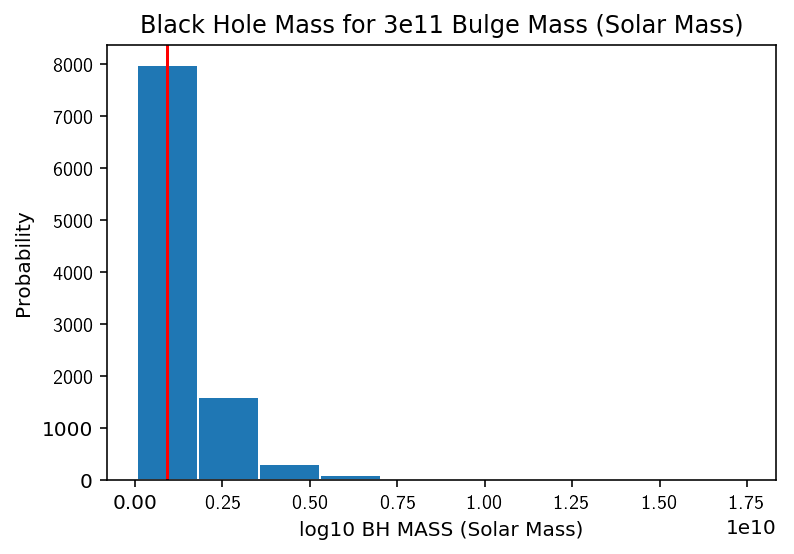

In [10]:
#MM13 full mass with scatter

plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass)")

plt.grid(False)
plt.rcParams['axes.facecolor'] = 'white'
plt.hist(numsScatterMM13, edgecolor = "w")
plt.axvline(x = MM13MassBulgeNoScatter(3e11), color = "red")

plt.rcParams.update(params)

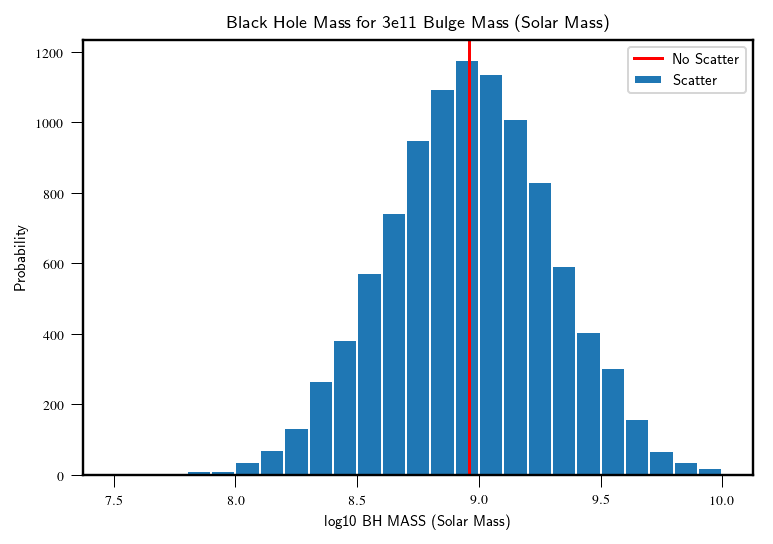

In [11]:
#MM13 logged mass with scatter

plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass)")

plt.grid(False)

plt.hist(numsLoggedMM13, edgecolor = "w", bins = bin_list)
plt.axvline(x = log10(MM13MassBulgeNoScatter(3e11)), color = "red")


plt.rcParams.update(params)

plt.legend(('No Scatter', 'Scatter'),loc='upper right')


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


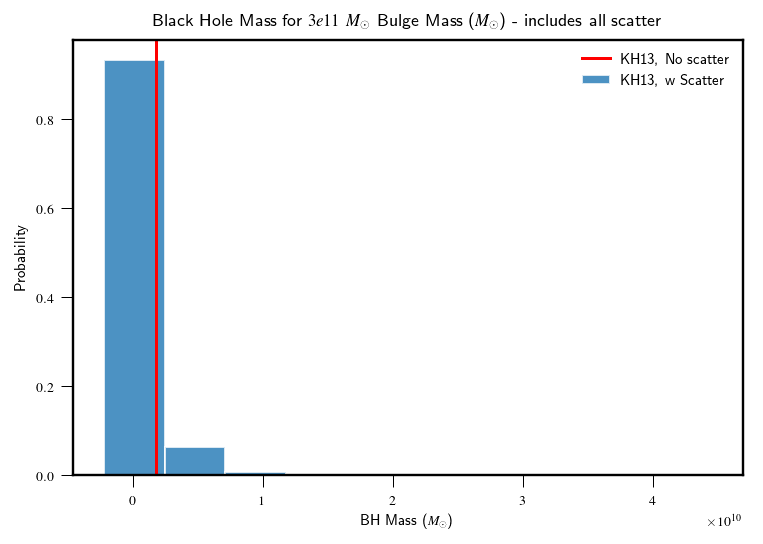

In [12]:
#KH13 full mass with scatter

fig = plt.figure()
ax = fig.add_subplot(111)

bin_list = auto_bin(0.1 ,7,11) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.
weights = hist_weight(numsScatterKH13)

plt.hist(numsScatterKH13, weights=weights, alpha = 0.8, align='left', color = 'C0', label = "KH13, w Scatter", edgecolor = "w")
plt.axvline(KH13MassBulgeNoScatter(3e11), color='red', label = "KH13, No scatter")
plt.xlabel("BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"Black Hole Mass for $3e11~M_\odot$ Bulge Mass ($M_\odot$) - includes all scatter")
plt.legend(frameon=False)
#plt.tight_layout()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


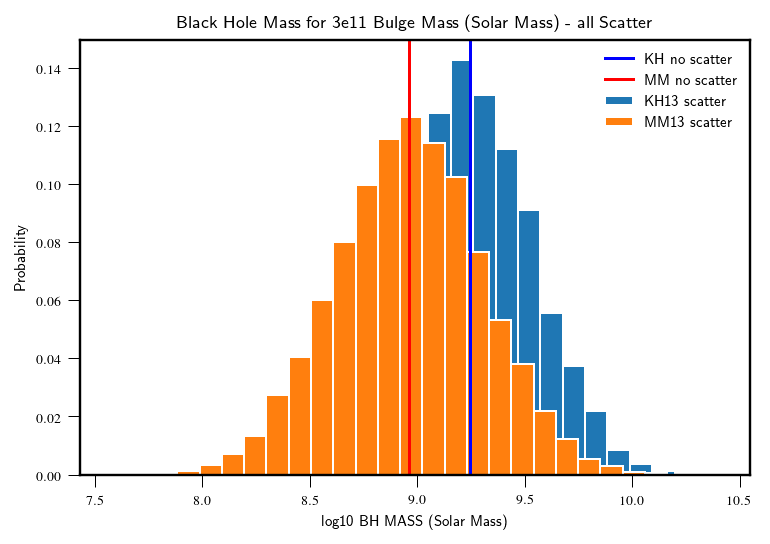

In [13]:
#KH13 and MM13 logged mass with scatter

plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass) - all Scatter")

plt.grid(False)
weightsKH = hist_weight(numsLoggedKH13)
weightsMM = hist_weight(numsLoggedMM13)

plt.hist(numsLoggedKH13, bins = auto_bin(0.1, min(numsLoggedKH13), max(numsLoggedKH13)), edgecolor = "w", weights = weightsKH, label = "KH13 scatter")
plt.axvline(x = log10(KH13MassBulgeNoScatter(3e11)), color = "blue", label = "KH no scatter")

plt.hist(numsLoggedMM13, bins = auto_bin(0.1, min(numsLoggedMM13), max(numsLoggedMM13)), edgecolor = "w", weights = weightsMM, label = "MM13 scatter")
plt.axvline(x = log10(MM13MassBulgeNoScatter(3e11)), color = "red", label = "MM no scatter")

plt.legend(frameon=False)

#plt.rcParams.update(params)

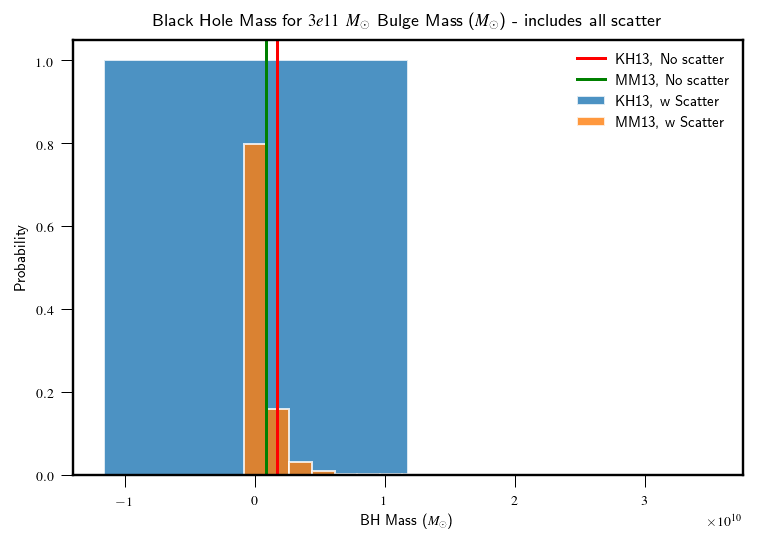

In [14]:
#MM13 and KH13 full mass with scatter

fig = plt.figure()
ax = fig.add_subplot(111)

#bin_list = auto_bin(0.1 ,7,11) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.
weightsKH = hist_weight(numsScatterKH13)
weightsMM = hist_weight(numsScatterMM13)

plt.hist(numsScatterKH13, weights=weightsKH, bins = 2, alpha = 0.8, align='left', color = 'C0', label = "KH13, w Scatter", edgecolor = "w")
plt.hist(numsScatterMM13, weights=weightsMM, alpha = 0.8, align='left', color = 'C1', label = "MM13, w Scatter", edgecolor = "w")

plt.axvline(KH13MassBulgeNoScatter(3e11), color='red', label = "KH13, No scatter")
plt.axvline(MM13MassBulgeNoScatter(3e11), color='green', label = "MM13, No scatter")


plt.xlabel("BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"Black Hole Mass for $3e11~M_\odot$ Bulge Mass ($M_\odot$) - includes all scatter")
plt.legend(frameon=False)
#plt.tight_layout()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


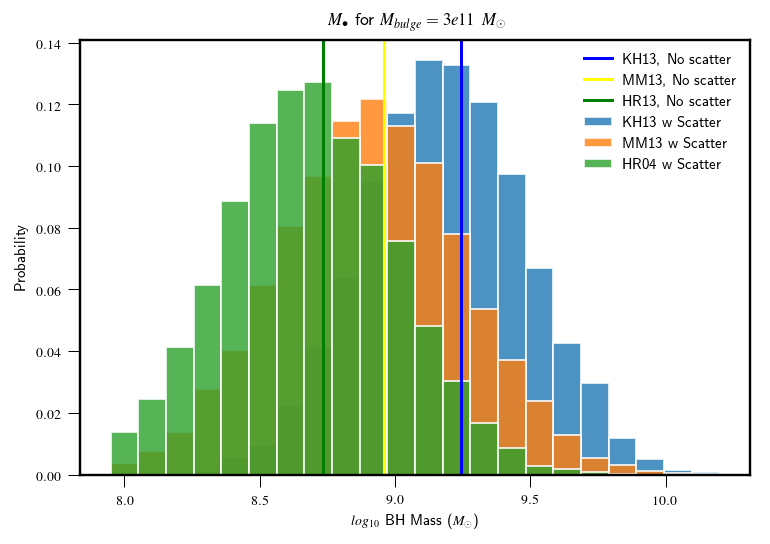

In [15]:
#KH13, MM13, HR04 logged mass with scatter
plt.grid(False)

#bin_list
bin_list = auto_bin(0.1 ,8.0,10.25) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.

#weights
weightsKHL = hist_weight(numsLoggedKH13)
weightsMML = hist_weight(numsLoggedMM13)
weightsHRL = hist_weight(numsLoggedHR04)

#logged masses with scatter
plt.hist(numsLoggedKH13, bins = bin_list,  weights=weightsKHL, alpha = 0.8, align='left', color = 'C0', label = "KH13 w Scatter", edgecolor = "w")
plt.hist(numsLoggedMM13,bins = bin_list, weights=weightsMML, alpha = 0.8, align='left', color = 'C1', label = "MM13 w Scatter", edgecolor = "w")
plt.hist(numsLoggedHR04,bins = bin_list, weights=weightsHRL, alpha = 0.8, align='left', color = 'C2', label = "HR04 w Scatter", edgecolor = "w")


#logged mass without scatter
plt.axvline(log10(KH13MassBulgeNoScatter(3e11)), color='blue', label = "KH13, No scatter")
plt.axvline(log10(MM13MassBulgeNoScatter(3e11)), color='yellow', label = "MM13, No scatter")
plt.axvline(log10(HR04MassBulgeNoScatter(3e11)), color='green', label = "HR13, No scatter")


#style
plt.xlabel("$log_{10}$ BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"$M_\bullet$ for $M_{bulge} = 3e11~M_\odot$")
plt.legend(frameon=False)

#saved file
#plt.savefig("loggedBulgeMass.pdf")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


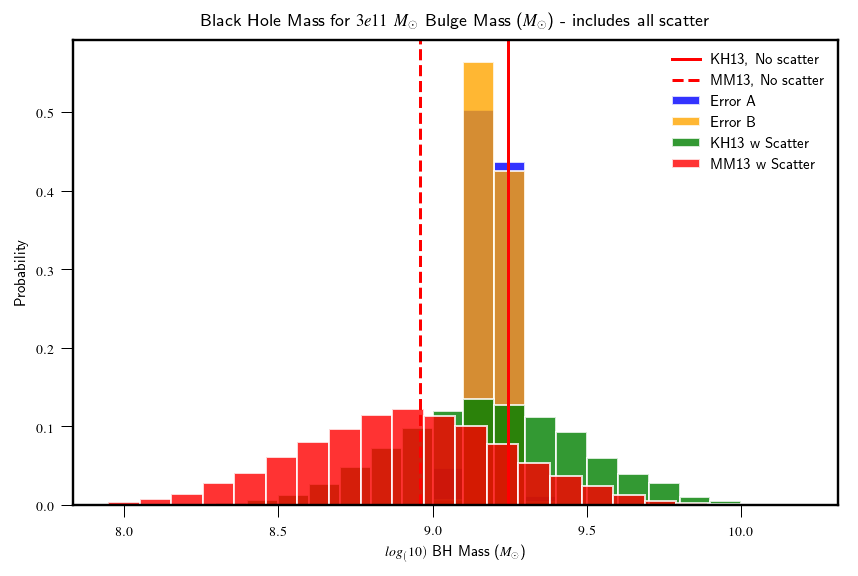

In [16]:
# all graphs together 

#constant
plt.grid(False)

bin_listKH = auto_bin(0.1 ,8.25, 10.25) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.
bin_list = auto_bin(0.1 ,8.0, 10.25)

weightsKHL = hist_weight(numsLoggedKH13)
weightsMML = hist_weight(numsLoggedMM13)
weightsKHA = hist_weight(numsScatterLogAKH13)
weightsKHB = hist_weight(numsScatterLogBKH13)

#no scatter plot -- good
plt.axvline(log10(KH13MassBulgeNoScatter(3e11)), color='red', label = "KH13, No scatter")
plt.axvline(log10(MM13MassBulgeNoScatter(3e11)), color='red', label = "MM13, No scatter", ls = "--")

#Errors A and B
plt.hist(numsScatterLogAKH13,bins = bin_listKH, weights=weightsKHA, alpha = 0.8, align='left', color = 'blue', label = "Error A", edgecolor = "w")
plt.hist(numsScatterLogBKH13,bins = bin_listKH, weights=weightsKHB, alpha = 0.8, align='left', color = 'orange', label = "Error B", edgecolor = "w")


#Scatter with Errors
plt.hist(numsLoggedKH13, bins = bin_listKH,  weights=weightsKHL, alpha = 0.8, align='left', color = 'green', label = "KH13 w Scatter", edgecolor = "w")
plt.hist(numsLoggedMM13, bins = bin_list, weights=weightsMML, alpha = 0.8, align='left', color = 'red', label = "MM13 w Scatter", edgecolor = "w")

#style
plt.xlabel("$log_(10)$ BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"Black Hole Mass for $3e11~M_\odot$ Bulge Mass ($M_\odot$) - includes all scatter")
plt.legend(frameon=False)
plt.tight_layout()

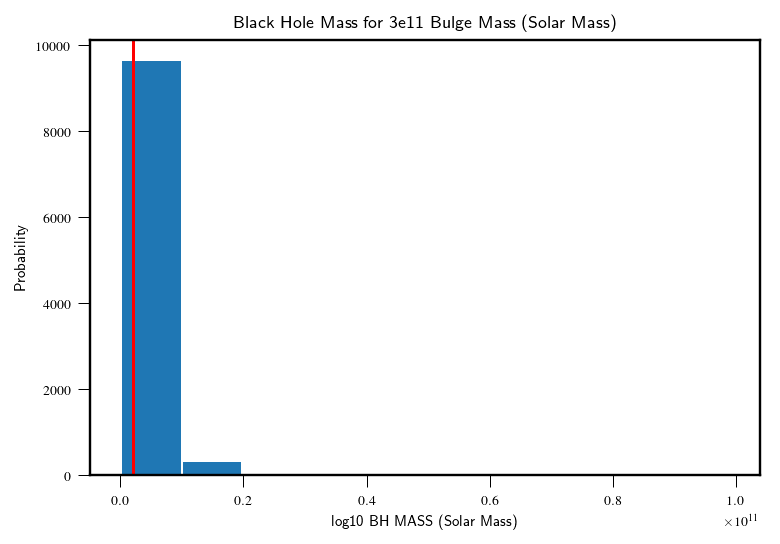

In [17]:
#MM13 full mass with scatter

plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass)")

plt.grid(False)
plt.rcParams['axes.facecolor'] = 'white'
plt.hist(numsSigScatterMM13, edgecolor = "w")
plt.axvline(x = MM13SigmaNoScatter(300), color = "red")

plt.rcParams.update(params)

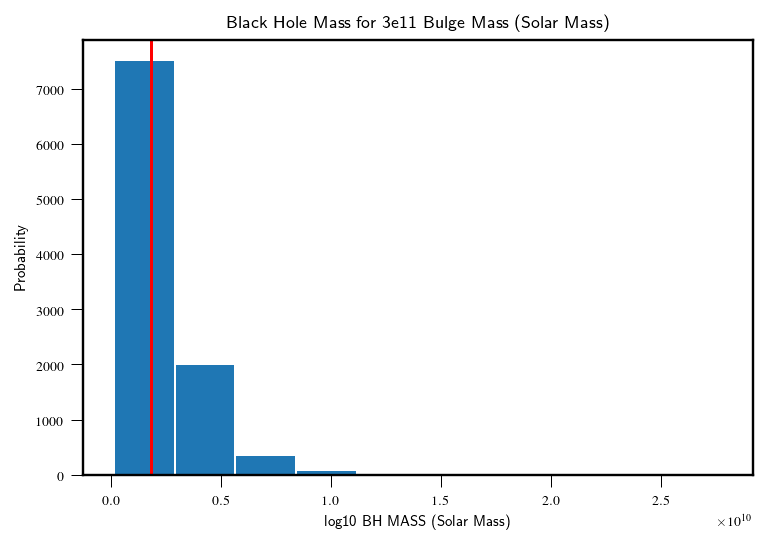

In [18]:
#HK13 full mass with scatter

plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass)")

plt.grid(False)
plt.rcParams['axes.facecolor'] = 'white'
plt.hist(numsSigScatterKH13, edgecolor = "w")
plt.axvline(x = KH13SigmaNoScatter(300), color = "red")

plt.rcParams.update(params)

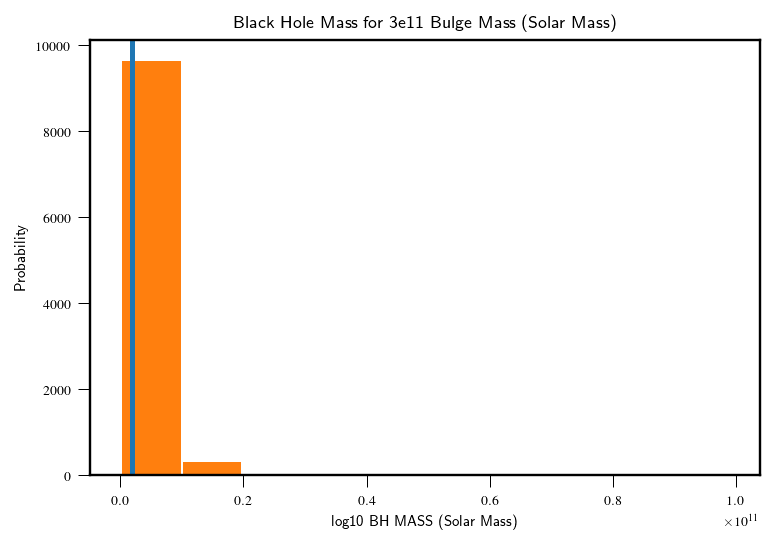

In [19]:
#HK13 and MM13 full mass with scatter
plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass)")

plt.grid(False)
plt.rcParams['axes.facecolor'] = 'white'

plt.hist(numsSigScatterKH13, edgecolor = "w", label = "KH w scatter")
plt.hist(numsSigScatterMM13, edgecolor = "w", label = "MM w scatter")

plt.axvline(x = KH13SigmaNoScatter(300), label = "KH no scatter")
plt.axvline(x = MM13SigmaNoScatter(300), label = "MM no scatter")

plt.rcParams.update(params)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


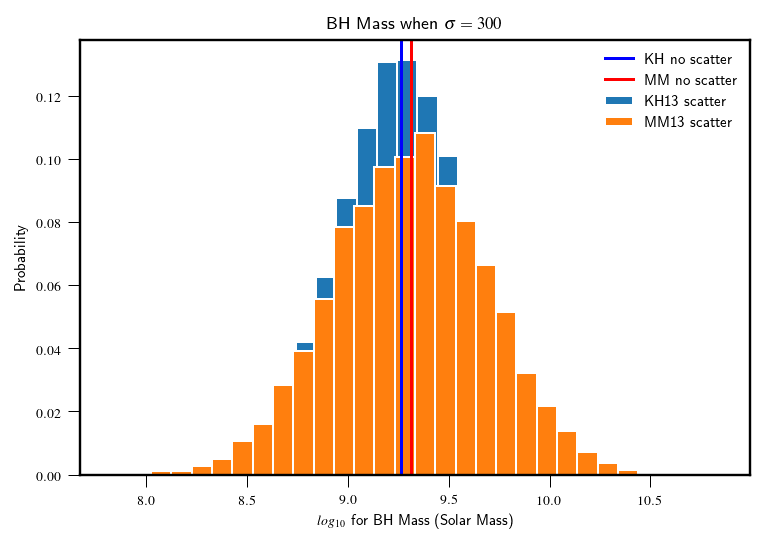

In [20]:
#KH13 and MM13 logged mass with scatter sigma 

plt.xlabel("$log_{10}$ for BH Mass (Solar Mass)")
plt.ylabel("Probability")
plt.title("BH Mass when $\sigma = 300$")

plt.grid(False)
weightsKH = hist_weight(numsSigLoggedKH13)
weightsMM = hist_weight(numsSigLoggedMM13)

plt.hist(numsSigLoggedKH13, bins = auto_bin(0.1, min(numsSigLoggedKH13), max(numsSigLoggedKH13)), edgecolor = "w", weights = weightsKH, label = "KH13 scatter")
plt.axvline(x = log10(KH13SigmaNoScatter(300)), color = "blue", label = "KH no scatter")

plt.hist(numsSigLoggedMM13, bins = auto_bin(0.1, min(numsSigLoggedMM13), max(numsSigLoggedMM13)), edgecolor = "w", weights = weightsMM, label = "MM13 scatter")
plt.axvline(x = log10(MM13SigmaNoScatter(300)), color = "red", label = "MM no scatter")

plt.legend(frameon=False)

#plt.rcParams.update(params)
#plt.savefig("loggedSigma.pdf")

In [21]:
# """
"""calculationg for M87
- bulge mass
"""

MM13M87Mass = []
KH13M87Mass = []
HR04M87Mass = []

for i in range(10000):
    expScatter = (np.random.normal(11.72, 0.09))
    MM13M87Mass.append(log10(MM13MassBulgeScatter(10**(expScatter))))
    KH13M87Mass.append(log10(KH13MassBulgeScatter(10**(expScatter))))
    HR04M87Mass.append(log10(HR04MassBulgeScatter(10**(expScatter))))


In [22]:

StellarM87Mass = []
GasM87Mass = []

for i in range(10000):
    StellarM87Mass.append(log10((np.random.normal(6.6, 0.4)) * 10**9))
    GasM87Mass.append(log10((np.random.normal(3.5, 0.9)) * 10**9))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


(array([2.000e-04, 5.000e-04, 1.700e-03, 5.700e-03, 1.770e-02, 6.410e-02,
        2.158e-01, 4.212e-01, 2.535e-01, 1.960e-02]),
 array([8.62253242, 8.74574665, 8.86896088, 8.9921751 , 9.11538933,
        9.23860356, 9.36181779, 9.48503201, 9.60824624, 9.73146047,
        9.8546747 ]),
 <a list of 10 Patch objects>)

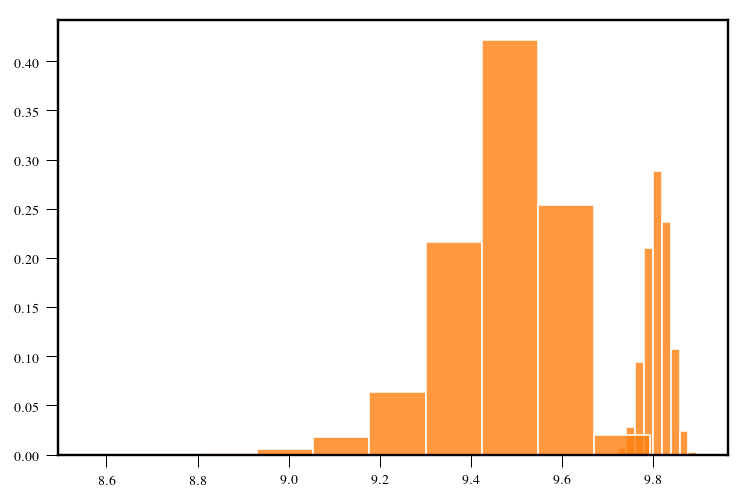

In [23]:
weightStellar = hist_weight(StellarM87Mass)
weightGas = hist_weight(GasM87Mass)
bin_list = auto_bin(0.1 ,8.0,11)

plt.hist(StellarM87Mass, weights=weightStellar, alpha = 0.8, align='left', color = 'C1', label = "Stellar", edgecolor = "w")
plt.hist(GasM87Mass, weights=weightGas, alpha = 0.8, align='left', color = 'C1', label = "Gas", edgecolor = "w")





/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


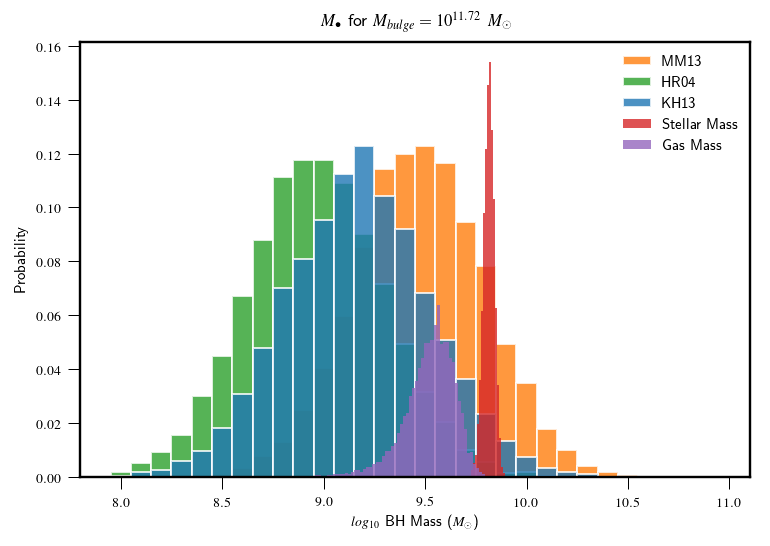

In [24]:
#KH13, MM13, HR04 logged mass with scatter for M87
plt.grid(False)

#bin_list
bin_list = auto_bin(0.1 ,8.0,11) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.

#weights
weightsKHL = hist_weight(MM13M87Mass)
weightsMML = hist_weight(KH13M87Mass)
weightsHRL = hist_weight(HR04M87Mass)

weightStellar = hist_weight(StellarM87Mass)
weightGas = hist_weight(GasM87Mass)

#logged masses with scatter

plt.hist(KH13M87Mass,bins = bin_list, weights=weightsMML, alpha = 0.8, align='left', color = 'C1', label = "MM13", edgecolor = "w")
plt.hist(HR04M87Mass,bins = bin_list, weights=weightsHRL, alpha = 0.8, align='left', color = 'C2', label = "HR04", edgecolor = "w")
plt.hist(MM13M87Mass,bins = bin_list,  weights=weightsKHL, alpha = 0.8, align='left', color = 'C0', label = "KH13", edgecolor = "w")

bin_listStellar = auto_bin(.01, 8, 10)
bin_listGas = auto_bin(.015, 8, 10)

plt.hist(StellarM87Mass,bins = bin_listStellar, weights=weightStellar, alpha = 0.8, align='left', color = 'C3', label = "Stellar Mass")
plt.hist(GasM87Mass,bins = bin_listGas, weights=weightGas, alpha = 0.8, align='left', color = 'C4', label = "Gas Mass")

#style
plt.xlabel("$log_{10}$ BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"$M_\bullet$ for $M_{bulge} = 10^{11.72}~M_\odot$")
plt.legend(frameon=False)

#saved file
#plt.savefig("M87MassTest.pdf")

In [25]:
"""
calculationg for M87
- Sigma
"""

MM13M87Sigma = []
KH13M87Sigma = []


for i in range(10000):
    sig_scatter = np.random.normal(324, 28)
    MM13M87Sigma.append(log10(MM13SigmaScatter(sig_scatter)))
    KH13M87Sigma.append(log10(KH13SigmaScatter(sig_scatter)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


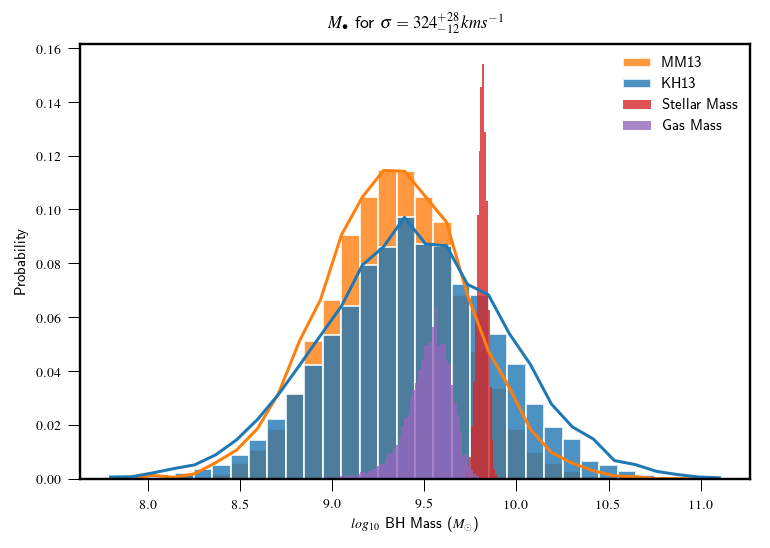

In [26]:
## KH13, MM13,logged mass with scatter for M87
plt.grid(False)

#bin_list
bin_list = auto_bin(0.1 ,8.0,11) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.

#weights
weightsKHL = hist_weight(MM13M87Sigma)
weightsMML = hist_weight(KH13M87Sigma)

weightStellar = hist_weight(StellarM87Mass)
weightGas = hist_weight(GasM87Mass)

#logged masses with scatter
fitKH, binsKH, patches = plt.hist(KH13M87Sigma,bins = bin_list, weights=weightsMML, alpha = 0.8, align='left', color = 'C1', label = "MM13", edgecolor = "w")
fitMM, binsMM, patches = plt.hist(MM13M87Sigma,bins = bin_list,  weights=weightsKHL, alpha = 0.8, align='left', color = 'C0', label = "KH13", edgecolor = "w")

#out line bets fits
xmin, xmax = plt.xlim()
xKH = np.linspace(xmin, xmax, len(binsKH) - 1)
xMM = np.linspace(xmin, xmax, len(binsMM) - 1)

plt.plot(xKH, fitKH,  color = 'C1')
plt.plot(xMM, fitMM,  color = 'C0')





# plot the histogram



#logged mass of dynamical methods
bin_listStellar = auto_bin(.01, 8, 10)
bin_listGas = auto_bin(.015, 8, 10)

plt.hist(StellarM87Mass,bins = bin_listStellar, weights=weightStellar, alpha = 0.8, align='left', color = 'C3', label = "Stellar Mass")
plt.hist(GasM87Mass,bins = bin_listGas, weights=weightGas, alpha = 0.8, align='left', color = 'C4', label = "Gas Mass")





#style
plt.xlabel("$log_{10}$ BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"$M_\bullet$ for $\sigma = 324^{+28}_{-12}kms^{-1}$")
plt.legend(frameon=False)

#saved file
#plt.savefig("M87SigmaTest.pdf")